In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from get_pong_data import get_objects_locations

In [7]:
get_objects_locations(train_data[1][0])

(array([ 145.5,   80.5]), array([ 28.5,  94.5]), array([ 449.5,  151.5]))

In [2]:
#480 #270 #1

In [25]:
train_data = np.load(file="train_data/training_data-3.npy", encoding='bytes')

In [26]:
train_data.shape

(1000, 2)

In [27]:
np.sum(np.array(train_data[:,1].tolist()), axis=0)

array([845,  98,  57])

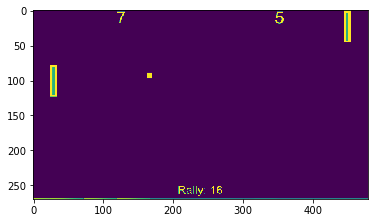

In [24]:
plt.imshow(train_data[1][0])

normalize
normalize everything to 1 and 0?
create model
train model

## Create model

In [28]:
def pong_dense_model():
    inputs = tf.placeholder(dtype=tf.float32, shape=[None, 6])
    
    y = tf.placeholder(dtype=tf.float32, shape=[None, 3])
    
    h1 = dense(inputs, 20, activation=tf.nn.relu)
    
    logits = dense(h1, 3, activation=None)

    sc = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

    cost = tf.reduce_mean(sc)

    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    return inputs, y, logits, cost, accuracy
    

In [6]:
#from pong_model import pong_model

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()


inputs, y, logits, cost, accuracy = pong_dense_model

#inputs = tf.placeholder(dtype=tf.float32, shape=[None, 270, 480, 1])

#y = tf.placeholder(dtype=tf.float32, shape=[None, 3])

#Divide inputs by 255 for normalization
#x = conv2d(inputs/255, 10, 5, 2, 'SAME')
#x = conv2d(x, 20, 5, 2, 'SAME')
#x = conv2d(x, 40, 5, 2, 'SAME')
#x = conv2d(x, 80, 5, 2, 'SAME')

#x = tf.contrib.layers.flatten(x)

#x = dense(x,5000,activation=tf.nn.relu)
#x = dense(x,500,activation=tf.nn.relu)
#x = dense(x,100,activation=tf.nn.relu)
#x = dense(x,50,activation=tf.nn.relu)

#logits = dense(x,3,activation=None)


#sc = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

#cost = tf.reduce_mean(sc)

# Accuracy
#correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)



In [8]:
from random import shuffle
from sklearn.model_selection import train_test_split

epochs = 3
FILE_I_END = 4
WIDTH = 480
HEIGHT = 270
batch_size = 100

with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):

        data_order = [i for i in range(1,FILE_I_END+1)]
        shuffle(data_order)
        
        for count,i in enumerate(data_order):

            try:
                file_name = 'train_data/training_data-{}.npy'.format(i)
                # full file info
                train_data = np.load(file_name, encoding='bytes')
                shuffle(train_data)
                print('training_data-{}.npy'.format(i),len(train_data))
                
                valid_data = train_data[800:]
                train_data = train_data[:800]
                
                train_X = np.array([i[0] for i in train_data]).reshape(-1,HEIGHT,WIDTH,1)
                train_Y = np.array([i[1] for i in train_data])
                
                valid_X = np.array([i[0] for i in valid_data]).reshape(-1,HEIGHT,WIDTH,1)
                valid_Y = np.array([i[1] for i in valid_data])
                
                for b in range(0, 800, batch_size):
                    
                    cost_value, _ = sess.run([cost, optimizer], feed_dict={
                        inputs: train_X[b:b+batch_size],
                        y: train_Y[b:b+batch_size]
                    })
                    print("Batch: {} Cost: {}".format(b, cost_value))
                
                acc_value = sess.run(accuracy, feed_dict={
                    inputs: valid_X,
                    y: valid_Y
                })
                
                print("Accuracy: {}".format(acc_value))
                print("")

                #model.fit({'input': X}, {'targets': Y}, n_epoch=1, validation_set=({'input': test_x}, {'targets': test_y}), 
                    #snapshot_step=2500, show_metric=True, run_id=MODEL_NAME)


                #if count%10 == 0:
                    #print('SAVING MODEL!')
                    #model.save(MODEL_NAME)

            except Exception as e:
                print(str(e))
             
    saver = tf.train.Saver()
    save_path = saver.save(sess, "./model/model.ckpt")

training_data-1.npy 1000
Batch: 0 Cost: 1.0918827056884766
Batch: 100 Cost: 0.626941442489624
Batch: 200 Cost: 0.7064834833145142
Batch: 300 Cost: 0.12463074922561646
Batch: 400 Cost: 1.4217376708984375
Batch: 500 Cost: 0.2523740828037262
Batch: 600 Cost: 0.23921632766723633
Batch: 700 Cost: 0.48375004529953003
Accuracy: 0.824999988079071

training_data-4.npy 1000
Batch: 0 Cost: 0.6370262503623962
Batch: 100 Cost: 0.8621586561203003
Batch: 200 Cost: 0.6963252425193787
Batch: 300 Cost: 0.6341063976287842
Batch: 400 Cost: 0.5601292252540588
Batch: 500 Cost: 0.9130372405052185
Batch: 600 Cost: 0.6417705416679382
Batch: 700 Cost: 0.454874724149704
Accuracy: 0.824999988079071

training_data-2.npy 1000
Batch: 0 Cost: 0.2237546145915985
Batch: 100 Cost: 0.5487390160560608
Batch: 200 Cost: 0.6997503042221069
Batch: 300 Cost: 0.6697346568107605
Batch: 400 Cost: 0.8171801567077637
Batch: 500 Cost: 0.7279303073883057
Batch: 600 Cost: 0.6201783418655396
Batch: 700 Cost: 0.5420321822166443
Accuracy